In [1]:
import scipy.stats
import json

def read(d,n,p=32749):
    return json.loads(open(f'data/v-d{d}n{n}p{p}.json').read())

def pl_hist(d,n,bins=100,p=32749):
    v = stats.TimeSeries(read(d,n,p))
    sigma = v.standard_deviation()
    T = RealDistribution('gaussian', sigma)
    return histogram(v, bins=bins, density=True, frame=True) + T.plot(-3*sigma, 3*sigma, color='red', thickness=2, linestyle='--')



def pl_mean(d,n,p=32749):
    w = stats.TimeSeries(read(d,n,p))
    return stats.TimeSeries([w[:i].mean() for i in range(100,len(w))]).plot(plot_points=n, frame=True)

def pl_sd(d,n,p=32749):
    w = stats.TimeSeries(read(d,n,p))
    return stats.TimeSeries([w[:i].standard_deviation() for i in range(100,len(w))]).plot(plot_points=n, frame=True)

def pl(d,n,p=32749):
    print(f"d={d}, numCoeffs={n}")
    print(scipy.stats.normaltest(read(d,n,p)))  # "If the p-val is very small, it means it is unlikely that the data came from a normal distribution."
    show(graphics_array([[pl_hist(d,n), pl_hist(d,n,200)], [pl_mean(d,n), pl_sd(d,n)]]), figsize=[14,6])

d=3, numCoeffs=100000
NormaltestResult(statistic=13817.919144198584, pvalue=0.0)


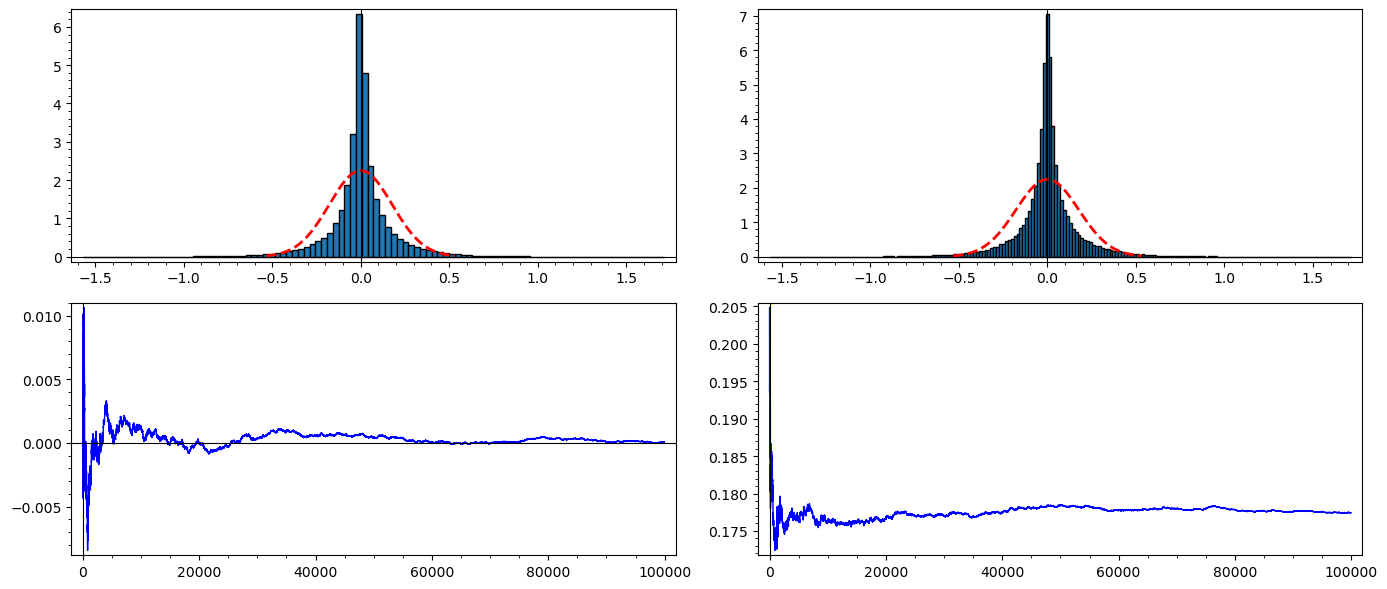

In [2]:
pl(3,100000)

d=5, numCoeffs=100000
NormaltestResult(statistic=15670.427368132105, pvalue=0.0)


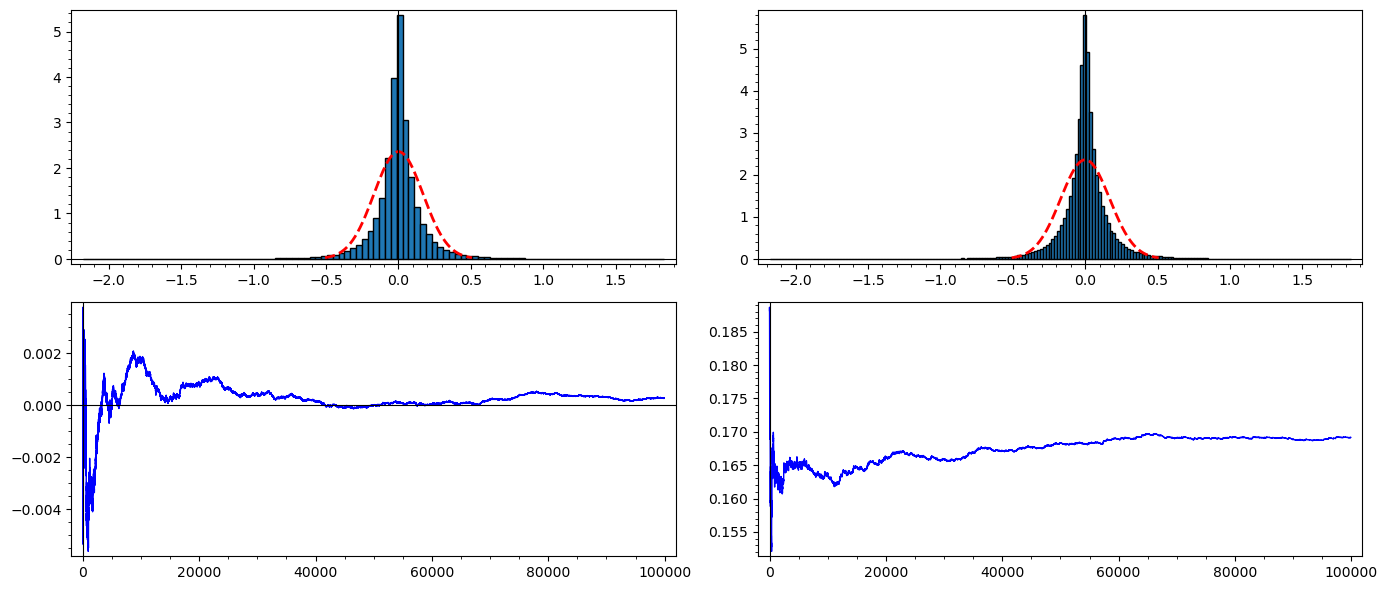

In [3]:
pl(5,100000)

d=7, numCoeffs=100000
NormaltestResult(statistic=12970.70602084363, pvalue=0.0)


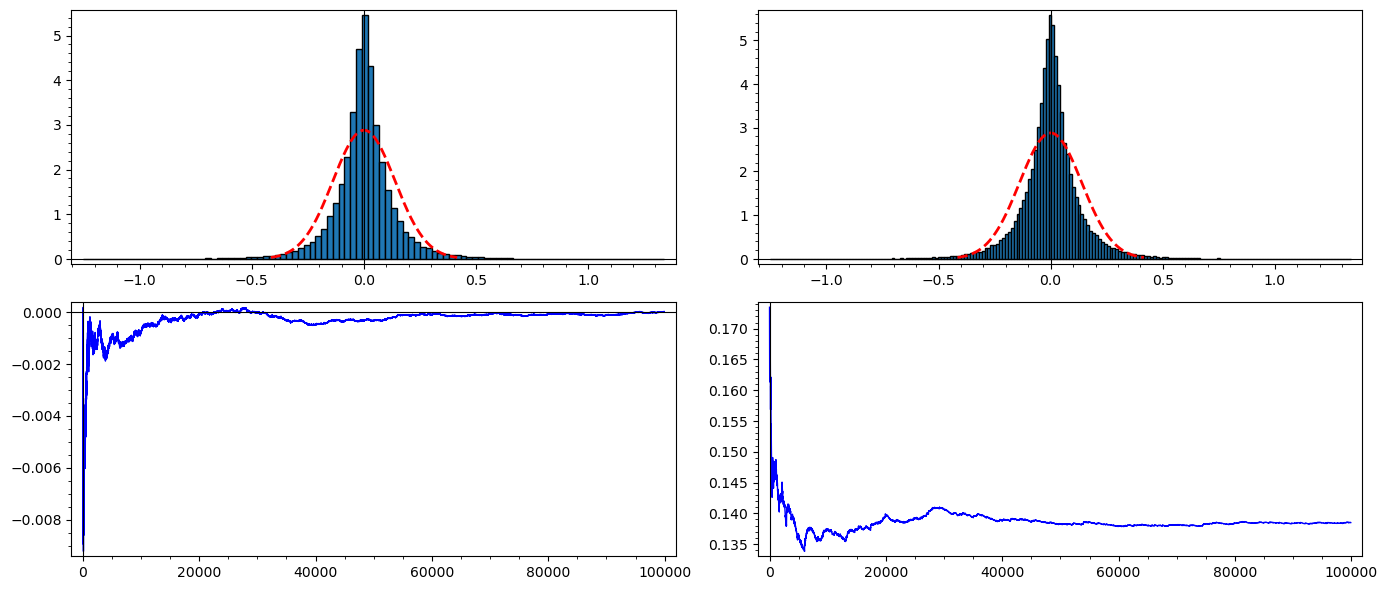

In [4]:
pl(7,100000)

d=11, numCoeffs=100000
NormaltestResult(statistic=7353.041264798775, pvalue=0.0)


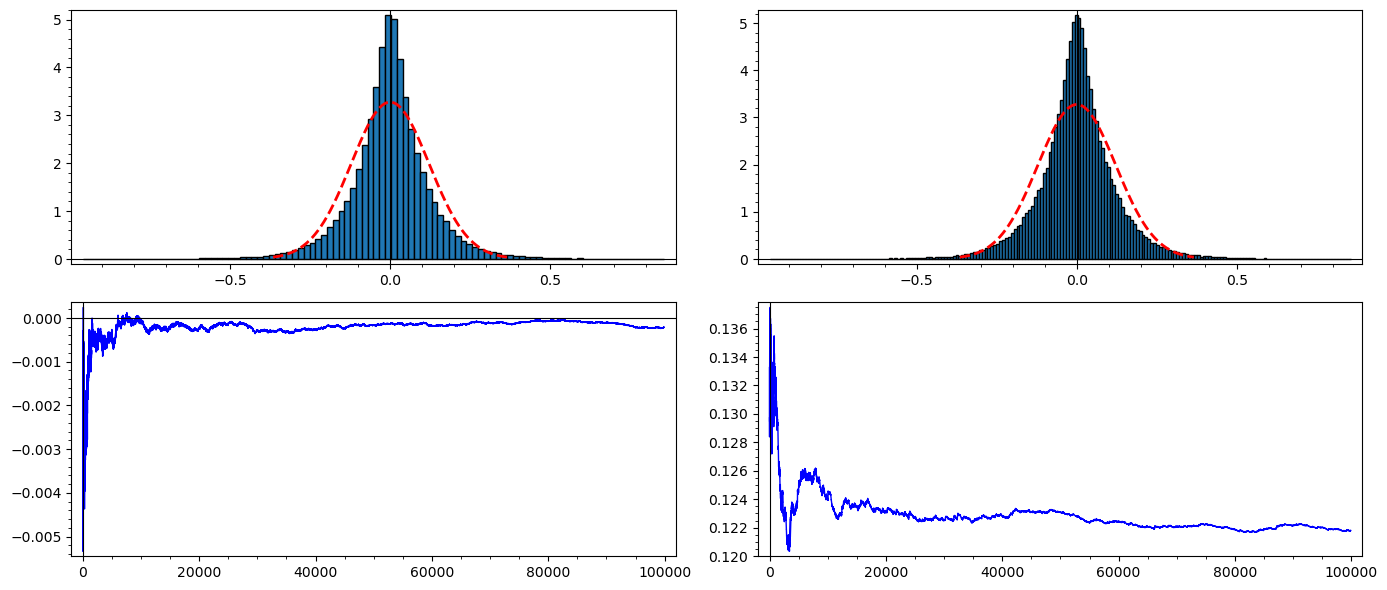

In [5]:
pl(11,100000)